# Logistic Regression for Multiclass Classification

In this part, we consider logistic regression for K > 2 classes. 
We have data ($\mathbf{x}_i$, y_i) for i = 1, 2, ..., N, where $\mathbf{x}_i\in\mathbb{R}^p$ is the input/feature and $y_i$ is the output/label, which indicates the class of the input.

We treat the output $y_i$ as a categorical variable, which indicates the class of the input.

## Model

We consider the augmented data $\mathbf{x}_i = [1, x_{i1}, x_{i2}, ..., x_{ip}]$ for i = 1, 2, ..., N, where $x_{ij}$ is the j-th feature of the i-th input, and we assume that the output $y_i$ can take K different values, 1, ..., K

We assume the the probability of the input $\mathbf{x}$ belonging to class 1 to K is given by a vector

$$
f(\mathbf{x}; \mathbf{W}) = 
\begin{bmatrix}
f_1(\mathbf{x}; \mathbf{W}) \\
f_2(\mathbf{x}; \mathbf{W}) \\
\vdots \\
f_K(\mathbf{x}; \mathbf{W})
\end{bmatrix}
=
\frac{1}{\sum_{k=1}^K \exp(\mathbf{w}_k^T\mathbf{x})}
\begin{bmatrix}
\exp(\mathbf{w}_1^T\mathbf{x}) \\
\exp(\mathbf{w}_2^T\mathbf{x}) \\
\vdots \\
\exp(\mathbf{w}_K^T\mathbf{x})
\end{bmatrix}
$$

where $\mathbf{w}_i$ is the weight vector for class i,  $f_i(\mathbf{x};\mathbf{W})$ is the probability of the input $\mathbf{x}$ belonging to class i.
and $\mathbf{W}$ is the matrix of all weight vectors.

## Cross-entropy loss

Define the indicator variable $y_{ik}$ as

$$
y_{ik} = 
\begin{cases}
1 & \text{if } y_i \text{ is class k} \\
0 & \text{otherwise}
\end{cases}
$$

Essentiall, we encode the categorical variable $y_{i}$ as a vector in $\mathbb{R}^K$ with a 1 at the k-th position and 0 elsewhere.

The cross-entropy loss is given by

$$
L(\mathbf{W}) = -\sum_{i=1}^N \sum_{k=1}^K y_{ik}\log(f_k(\mathbf{x}_i; \mathbf{W}))
$$

And the optimal weight matrix $\mathbf{W}$ is obtained by minimizing the loss function $L(\mathbf{W})$.

## Visualization

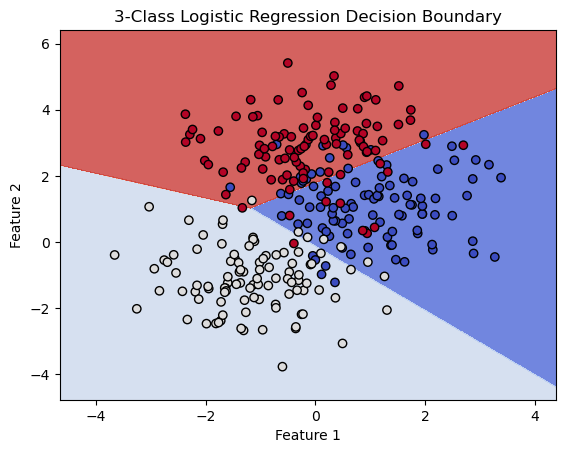

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

# Set random seed for reproducibility
np.random.seed(0)

# Number of samples per class
N = 100

# Generate data for three classes, each class has a different mean
x_class1 = np.random.multivariate_normal([1, 1], np.eye(2), N)
x_class2 = np.random.multivariate_normal([-1, -1], np.eye(2), N)
x_class3 = np.random.multivariate_normal([0, 3], np.eye(2), N)

# Combine into a single dataset
X = np.vstack((x_class1, x_class2, x_class3))
y = np.concatenate((np.zeros(N), np.ones(N), 2*np.ones(N)))

# Create a logistic regression classifier with multinomial option for multi-class
clf = LogisticRegression(multi_class='multinomial', penalty=None)
clf.fit(X, y)

# Create a mesh to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh points to find the decision boundaries
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')

plt.title('3-Class Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


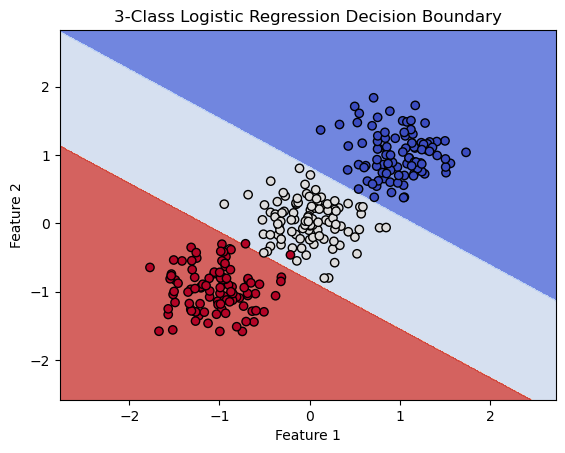

In [5]:
# Number of samples per class
N = 100

# Generate data for three classes, each class has a different mean
x_class1 = np.random.multivariate_normal([1, 1],    0.1*np.eye(2), N)
x_class2 = np.random.multivariate_normal([0, 0],    0.1*np.eye(2), N)
x_class3 = np.random.multivariate_normal([-1, -1],  0.1*np.eye(2), N)

# Combine into a single dataset
X = np.vstack((x_class1, x_class2, x_class3))
y = np.concatenate((np.zeros(N), np.ones(N), 2*np.ones(N)))

# Create a logistic regression classifier with multinomial option for multi-class
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty=None)
clf.fit(X, y)

# Create a mesh to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh points to find the decision boundaries
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')

plt.title('3-Class Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


## Classification using penguins dataset

Training accuracy: 1.00
Test accuracy: 0.99
Confusion Matrix:
 [[44  0  0]
 [ 1 12  0]
 [ 0  0 29]]


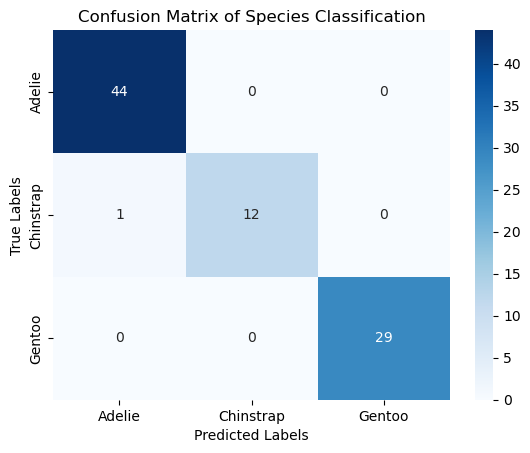

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Load the dataset
df = sns.load_dataset('penguins')

# Drop rows with missing values
df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], inplace=True)

# Encode the target variable species
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])


features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# scale the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Select features
X = df[features]
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initialize and train the logistic regression model
clf = LogisticRegression(penalty=None)
clf.fit(X_train, y_train)

# Calculate the training and test accuracy
score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)
print(f"Training accuracy: {score_train:.2f}")
print(f"Test accuracy: {score_test:.2f}")


# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Species Classification')
plt.show()
